## Gradient Descent

### define model

In [9]:
import numpy as np  
import matplotlib.pyplot as plt  

x = 2.0 # 입력값 (x). 모델은 y_hat = w * x 임. 
y = 10.0 # 정답 (y). 목표는 y_hat이 y와 같아지는 w(정답: 5)를 찾는 것임

loss_func = lambda w, x, y: (w * x - y)**2 # 손실 함수 L = (y_hat - y)^2 = (w*x - y)^2
gradient_func = lambda w, x, y: 2 * x * (w * x - y) # 손실 함수를 w에 대해 미분한 값 dL/dw = 2x(wx - y)


#### define train loop

In [10]:
w_init = -4.0 # 시작 가중치를 임의의 값으로 설정
learning_rate = 0.05 # 학습률을 설정.
epochs = 10 # 학습 반복 횟수

w_history = [w_init]    # w 값의 변화를 기록할 리스트
w = w_init              # w를 초기값으로 설정
for _ in range(epochs): # 설정한 횟수만큼 반복
	gradient = gradient_func(w, x, y) # 현재 w에서의 기울기를 계산
	w = w - learning_rate * gradient # 가중치를 업데이트
	w_history.append(w) # 업데이트된 w를 기록
	print(f"현재 기울기: {gradient:.2f}, 업데이트된 w: {w:.2f}, 손실: {loss_func(w, x, y):.4f}") # 현재 기울기와 업데이트된 w 출력



현재 기울기: -72.00, 업데이트된 w: -0.40, 손실: 116.6400
현재 기울기: -43.20, 업데이트된 w: 1.76, 손실: 41.9904
현재 기울기: -25.92, 업데이트된 w: 3.06, 손실: 15.1165
현재 기울기: -15.55, 업데이트된 w: 3.83, 손실: 5.4420
현재 기울기: -9.33, 업데이트된 w: 4.30, 손실: 1.9591
현재 기울기: -5.60, 업데이트된 w: 4.58, 손실: 0.7053
현재 기울기: -3.36, 업데이트된 w: 4.75, 손실: 0.2539
현재 기울기: -2.02, 업데이트된 w: 4.85, 손실: 0.0914
현재 기울기: -1.21, 업데이트된 w: 4.91, 손실: 0.0329
현재 기울기: -0.73, 업데이트된 w: 4.95, 손실: 0.0118


#### Draw loss-parameter graph

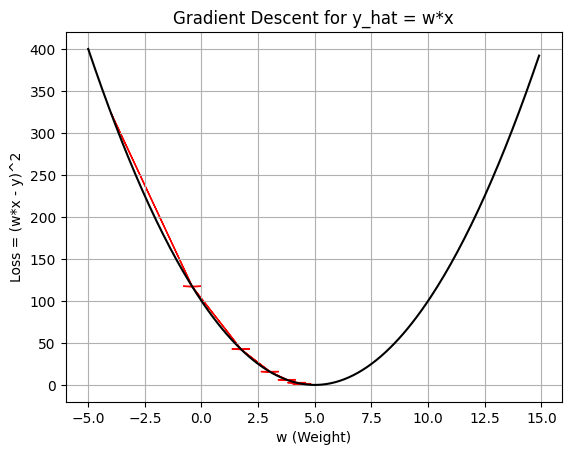

In [12]:
w_range = np.arange(-5, 15, 0.1) 		# 그래프를 그릴 w의 범위 설정
loss_range = loss_func(w_range, x, y) 	# 해당 범위의 손실(L) 값 계산
plt.plot(w_range, loss_range, 'k') 		# 검은색(k)으로 손실 함수 그래프(포물선)를 그림

for i in range(len(w_history) - 1): 	# 경사하강 시 기록된 w의 개수만큼 반복
	w_start, w_end = w_history[i], w_history[i+1] 	# 경사하강 화살표 시작점과 끝점의 w
	loss_start = loss_func(w_start, x, y) 			# 화살표 시작점의 Loss
	loss_end = loss_func(w_end, x, y) 				# 화살표 끝점의 Loss

	plt.arrow(w_start, loss_start, w_end - w_start, loss_end - loss_start,
			  head_width=0.8, head_length=0.8, fc='red', ec='red', length_includes_head=True)

plt.xlabel("w (Weight)") 			# x축 라벨 설정
plt.ylabel("Loss = (w*x - y)^2") 	# y축 라벨 설정 (손실 함수 수식 포함)
plt.title("Gradient Descent for y_hat = w*x")  
plt.grid(True)  
plt.show() 